<a href="https://colab.research.google.com/github/RAGHUKALLI/ineuron/blob/master/ProjectAttritionAnalysisDay12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:** A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

Columns
EmployeeIDEmployee number/id
EnvironmentSatisfactionWork Environment Satisfaction Level
JobSatisfactionJob Involvement Level Job Involvement Level Job Involvement Level
WorkLifeBalanceWork life balance level

**Step 1 : Launching**

In [30]:
#importing needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import math as m
from scipy.stats import pearsonr
import statistics as st

In [31]:
# Reading the data files
url='https://raw.githubusercontent.com/LetsUpgrade/AI-ML-July-2020/master/Day-7/Assignment/general_data.csv'
dataset=pd.read_csv(url,error_bad_lines=False)

In [32]:
# Viewing top 5 rows of the file
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [33]:
# Viewing bottom 5 rows of the file
dataset.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,2,Laboratory Technician,Divorced,54680,0.0,Y,12,8,0,NaN,6,21,3,9


**Step 2 : Data Treatment**

In [34]:
# Checking if any null values present in the data file. 
dataset.isnull()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
# summary of the data file
dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [36]:
#Checking if any duplicate Employee Id is present to ensure no employee id is captured twice in data file.
dupdata=dataset["EmployeeID"].duplicated() 
dataset[dupdata]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager


In [37]:
# Concise summary of dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [38]:
# Removing unwanted columns from the data file: The columns Employee ID, Employee count, Standard hours and over18 are insigificant for analysis. So we are deleting these columns.
dataset1=dataset.drop(["EmployeeID","EmployeeCount","StandardHours","Over18"],axis=1)
dataset1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.0,2,9,7,8


In [39]:
# Concise summary of data file
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [40]:
dataset1.replace(('Yes','No'),(1,0),inplace=True)
dataset1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,29,0,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2
4408,42,0,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.0,2,9,7,8


In [42]:
dataset1.replace(('Non-Travel','Travel_Rarely','Travel_Frequently'),(0,1,2),inplace=True)
dataset1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,1,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,2,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,2,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,1,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,1,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,29,0,1,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,25,0,1,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2
4408,42,0,1,Sales,18,2,Medical,Male,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.0,2,9,7,8


In [43]:
dataset1.replace(('Human Resources','Research & Development','Sales'),(0,1,2),inplace=True)
dataset1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,1,2,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,2,1,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,2,1,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,Life Sciences,Male,3,0,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,1,1,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,1,1,5,4,Medical,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,29,0,1,1,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,25,0,1,1,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2
4408,42,0,1,2,18,2,Medical,Male,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.0,2,9,7,8


In [44]:
dataset1.replace(('Human Resources','Life Sciences','Marketing','Medical','Other','Technical Degree'),(0,1,2,3,4,5),inplace=True)
dataset1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,1,2,6,2,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,2,1,10,1,1,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,2,1,17,4,4,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,Male,3,0,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,1,1,10,1,3,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,1,1,5,4,3,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,29,0,1,1,2,4,3,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,25,0,1,1,25,2,1,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2
4408,42,0,1,2,18,2,3,Male,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.0,2,9,7,8


In [45]:
dataset1.replace(('Healthcare Representative','Human Resources','Laboratory Technician','Manager','Manufacturing Director','Research Director','Research Scientist','Sales Executive','Sales Representative'),(0,1,2,3,4,5,6,7,8),inplace=True)
dataset1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,1,2,6,2,1,Female,1,0,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,2,1,10,1,1,Female,1,6,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,2,1,17,4,4,Male,4,7,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,Male,3,0,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,1,1,10,1,3,Male,1,7,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,1,1,5,4,3,Female,1,6,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,29,0,1,1,2,4,3,Male,1,2,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,25,0,1,1,25,2,1,Male,2,7,Married,37020,0.0,20,0,5.0,4,4,1,2
4408,42,0,1,2,18,2,3,Male,1,2,Divorced,23980,0.0,14,1,10.0,2,9,7,8


In [46]:
dataset1.replace(('Divorced','Married','Single'),(2,1,0),inplace=True)
dataset1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,1,2,6,2,1,Female,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,2,1,10,1,1,Female,1,6,0,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,2,1,17,4,4,Male,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,Male,3,0,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,1,1,10,1,3,Male,1,7,0,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,1,1,5,4,3,Female,1,6,0,60290,3.0,17,1,10.0,5,3,0,2
4406,29,0,1,1,2,4,3,Male,1,2,2,26790,2.0,15,0,10.0,2,3,0,2
4407,25,0,1,1,25,2,1,Male,2,7,1,37020,0.0,20,0,5.0,4,4,1,2
4408,42,0,1,2,18,2,3,Male,1,2,2,23980,0.0,14,1,10.0,2,9,7,8


In [48]:
dataset1.replace(('Male','Female'),(1,0),inplace=True)
dataset1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,1,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,2,1,10,1,1,0,1,6,0,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,2,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,0,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,1,1,10,1,3,1,1,7,0,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,1,1,5,4,3,0,1,6,0,60290,3.0,17,1,10.0,5,3,0,2
4406,29,0,1,1,2,4,3,1,1,2,2,26790,2.0,15,0,10.0,2,3,0,2
4407,25,0,1,1,25,2,1,1,2,7,1,37020,0.0,20,0,5.0,4,4,1,2
4408,42,0,1,2,18,2,3,1,1,2,2,23980,0.0,14,1,10.0,2,9,7,8


**Step 3: Univariate Analysis**

In [ ]:
# Finding correlation coefficient of the different variables
dataset1.corr()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006963,-0.035706,-0.002884,-0.044314,0.299243,-0.033137,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089
DistanceFromHome,0.006963,1.000000,-0.008638,-0.037329,-0.021607,-0.013843,0.038125,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.008638,1.000000,0.045746,0.006410,-0.016250,-0.040531,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358
JobLevel,-0.002884,-0.037329,0.045746,1.000000,0.047316,-0.009875,0.010973,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.021607,0.006410,0.047316,1.000000,-0.020726,0.004325,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299243,-0.013843,-0.016250,-0.009875,-0.020726,1.000000,0.030860,0.017163,0.238807,-0.032286,-0.117959,-0.036656,-0.109667
PercentSalaryHike,-0.033137,0.038125,-0.040531,0.010973,0.004325,0.030860,1.000000,0.012548,-0.018736,-0.037392,-0.029707,-0.029542,-0.040864
StockOptionLevel,-0.031753,0.011169,0.001261,0.000993,0.026930,0.017163,0.012548,1.000000,0.002694,-0.069902,0.007886,0.019063,0.017757
TotalWorkingYears,0.680661,0.009374,-0.010717,-0.036957,-0.033787,0.238807,-0.018736,0.002694,1.000000,-0.040762,0.627703,0.404444,0.458800
TrainingTimesLastYear,-0.027308,-0.009001,0.010472,-0.032500,0.050112,-0.032286,-0.037392,-0.069902,-0.040762,1.000000,-0.007894,0.016121,-0.013270


**Central Tendency and Dispersion Parameters**

In [49]:
dataset3=dataset1[['Age','DistanceFromHome','Education','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].mean()
dataset3

Age                           36.923810
DistanceFromHome               9.192517
Education                      2.912925
JobLevel                       2.063946
MonthlyIncome              65029.312925
NumCompaniesWorked             2.694830
PercentSalaryHike             15.209524
StockOptionLevel               0.793878
TotalWorkingYears             11.279936
TrainingTimesLastYear          2.799320
YearsAtCompany                 7.008163
YearsSinceLastPromotion        2.187755
YearsWithCurrManager           4.123129
dtype: float64

In [50]:
dataset3=dataset1[['Age','DistanceFromHome','Education','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].median()
dataset3

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
JobLevel                       2.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StockOptionLevel               1.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [51]:
dataset3=dataset1[['Age','DistanceFromHome','Education','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].mode()
dataset3

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,3,1,23420,1.0,11,0,10.0,2,5,0,2


In [52]:
dataset3=dataset1[['Age','DistanceFromHome','Education','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].var()
dataset3

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
JobLevel                   1.224760e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.244436e+00
PercentSalaryHike          1.338907e+01
StockOptionLevel           7.257053e-01
TotalWorkingYears          6.056298e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [53]:
dataset3=dataset1[['Age','DistanceFromHome','Education','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].skew()
dataset3

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
JobLevel                   1.024703
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
StockOptionLevel           0.968321
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [54]:
dataset3=dataset1[['Age','DistanceFromHome','Education','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].kurt()
dataset3

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
JobLevel                   0.395525
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
StockOptionLevel           0.361086
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

**Inference from analysis**
In the above analysis it is clear that attrributes Age, DistanceFromHome, Education are PercentSalaryHike having  substantially skewed distribution and distribution too flat so these are platykurtic whereas NumCompaniesWorked is mesokurtic and rest of the atrrributes are leptokurtic.

**Summary of Analysis:**
[link text](https://drive.google.com/file/d/1fpxIl44py9m3zlwVZV0yLYxIakXOLkLu/view?usp=sharing)

**Box Plots for attributes**

{'boxes': [<matplotlib.lines.Line2D at 0x7f8006297a20>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8006272470>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8006272ef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8006272b70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8006297d30>,
  <matplotlib.lines.Line2D at 0x7f80062720f0>]}

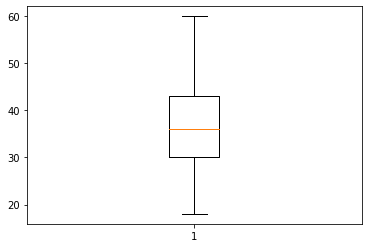

In [55]:
box_plot=dataset1.Age
plt.boxplot(box_plot)

{'boxes': [<matplotlib.lines.Line2D at 0x7f80061dd860>],
 'caps': [<matplotlib.lines.Line2D at 0x7f80061ec2b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f80061ecd30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f80061ec9b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f80061ddb70>,
  <matplotlib.lines.Line2D at 0x7f80061ddef0>]}

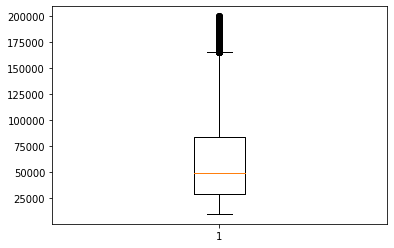

In [56]:
box_plot=dataset1.MonthlyIncome
plt.boxplot(box_plot)

{'boxes': [<matplotlib.lines.Line2D at 0x7f8005cff668>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8005d0a0b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8005d0ab38>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8005d0a7b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8005cff978>,
  <matplotlib.lines.Line2D at 0x7f8005cffcf8>]}

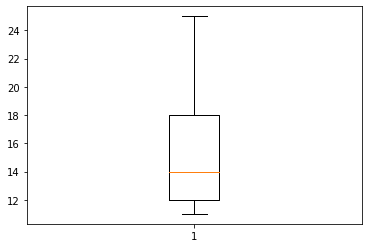

In [57]:
box_plot=dataset1.PercentSalaryHike
plt.boxplot(box_plot)

{'boxes': [<matplotlib.lines.Line2D at 0x7f8005cdeda0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8005c6d7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8005c752b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8005c6def0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8005c6d0f0>,
  <matplotlib.lines.Line2D at 0x7f8005c6d470>]}

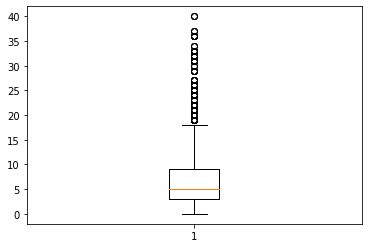

In [58]:
box_plot=dataset1.YearsAtCompany
plt.boxplot(box_plot)

In [ ]:
table=pd.crosstab(dataset1.Age,dataset1.Attrition)
table

Attrition,0,1
Age,,
18,12,12
19,9,18
20,15,18
21,21,18
22,33,15
23,30,12
24,57,21
25,60,18
26,81,36


In [ ]:
table=pd.crosstab(dataset1.DistanceFromHome,dataset1.Attrition)
table

Attrition,0,1
DistanceFromHome,,
1,528,96
2,519,114
3,222,30
4,159,33
5,165,30
6,156,21
7,204,48
8,207,33
9,219,36


In [ ]:
table=pd.crosstab(dataset1.Education,dataset1.Attrition)
table

Attrition,0,1
Education,,
1,432,78
2,687,159
3,1449,267
4,1008,186
5,123,21


In [ ]:
table=pd.crosstab(dataset1.JobLevel,dataset1.Attrition)
table

Attrition,0,1
JobLevel,,
1,1377,252
2,1317,285
3,558,96
4,267,51
5,180,27


In [ ]:
table=pd.crosstab(dataset1.MonthlyIncome,dataset1.Attrition)
table

Attrition,0,1
MonthlyIncome,,
10090,0,3
10510,3,0
10520,3,0
10810,3,0
10910,3,0
...,...,...
198590,0,3
199260,3,0
199430,3,0


In [ ]:
table=pd.crosstab(dataset1.PercentSalaryHike,dataset1.Attrition)
table

Attrition,0,1
PercentSalaryHike,,
11,540,90
12,504,90
13,525,102
14,516,87
15,240,63
16,204,30
17,201,45
18,228,39
19,186,42


In [59]:
dataset1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [60]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelBinarizer()

In [61]:
dataset1["Attrition"]=label_encoder.fit_transform(dataset1["Attrition"])

In [67]:
from scipy.stats import pearsonr
stats,p=pearsonr(dataset1.Attrition,dataset1.Age)
print(stats,p)


-0.15920500686577949 1.996801615887198e-26


In [63]:
stats,p2=pearsonr(dataset1.Attrition,dataset1.DistanceFromHome)
print(stats,p2)

-0.009730141010179692 0.5182860428050771


In [68]:
stats,p3=pearsonr(dataset1.Attrition,dataset1.BusinessTravel)
print(stats,p3)

0.1270064831524362 2.536639653019909e-17


In [69]:
stats,p4=pearsonr(dataset1.Attrition,dataset1.Department)
print(stats,p4)

-0.048205819918340026 0.0013638319632107141


In [70]:
stats,p5=pearsonr(dataset1.Attrition,dataset1.Education)
print(stats,p5)

-0.015111167710968721 0.3157293177118575


In [71]:
stats,p6=pearsonr(dataset1.Attrition,dataset1.EducationField)
print(stats,p6)

-0.05794031241568045 0.00011819790920714883


In [72]:
stats,p7=pearsonr(dataset1.Attrition,dataset1.Gender)
print(stats,p7)

0.018125078877010255 0.22881970951795952


In [73]:
stats,p8=pearsonr(dataset1.Attrition,dataset1.JobLevel)
print(stats,p8)

-0.010289713287494923 0.4945171727183978


In [74]:
stats,p9=pearsonr(dataset1.Attrition,dataset1.JobRole)
print(stats,p9)

0.026251498569587844 0.0813141826660312


In [75]:
stats,p10=pearsonr(dataset1.Attrition,dataset1.MaritalStatus)
print(stats,p10)

-0.1620702346570154 2.4449148399181716e-27


In [77]:
stats,p12=pearsonr(dataset1.Attrition,dataset1.PercentSalaryHike)
print(stats,p12)

0.0325325948910535 0.030743386433355353


In [78]:
stats,p13=pearsonr(dataset1.Attrition,dataset1.StockOptionLevel)
print(stats,p13)

-0.006838852403261526 0.6498072937475723


In [80]:
stats,p15=pearsonr(dataset1.Attrition,dataset1.TrainingTimesLastYear)
print(stats,p15)

-0.049430576244254974 0.0010247061915365072


In [81]:
stats,p16=pearsonr(dataset1.Attrition,dataset1.YearsAtCompany)
print(stats,p16)

-0.13439221398997717 3.1638831224877484e-19


In [82]:
stats,p17=pearsonr(dataset1.Attrition,dataset1.YearsSinceLastPromotion)
print(stats,p17)

-0.03301877514258437 0.028330336189396753


In [83]:
stats,p18=pearsonr(dataset1.Attrition,dataset1.YearsWithCurrManager)
print(stats,p18)

-0.15619931590162806 1.7339322652900218e-25


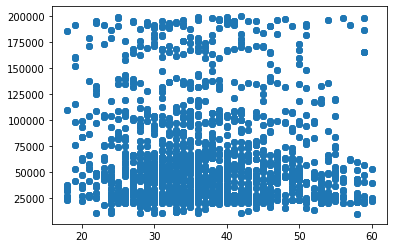

In [90]:
plt.scatter(dataset.Age,dataset.MonthlyIncome)

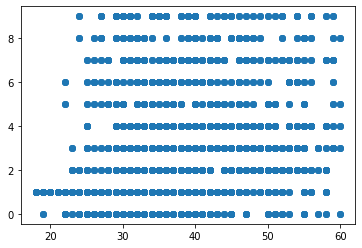

In [91]:
plt.scatter(dataset.Age,dataset.NumCompaniesWorked)

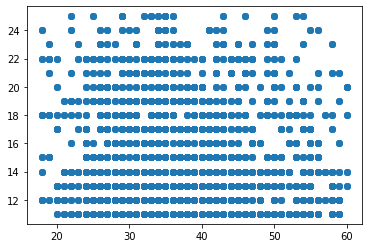

In [92]:
plt.scatter(dataset.Age,dataset.PercentSalaryHike)

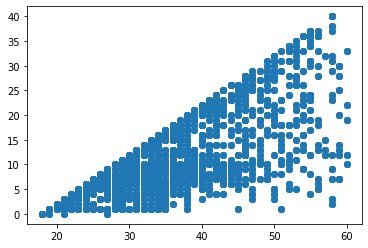

In [93]:
plt.scatter(dataset.Age,dataset.TotalWorkingYears)

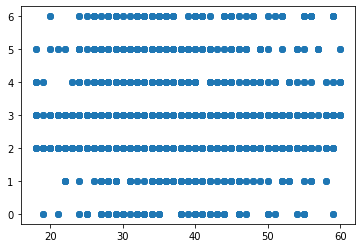

In [94]:
plt.scatter(dataset.Age,dataset.TrainingTimesLastYear)

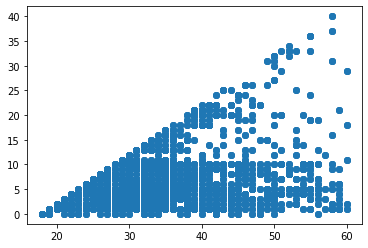

In [95]:
plt.scatter(dataset.Age,dataset.YearsAtCompany)

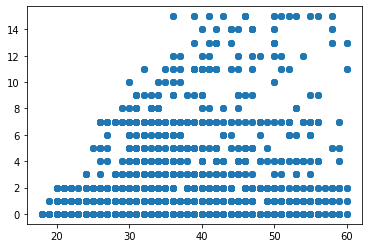

In [96]:
plt.scatter(dataset.Age,dataset.YearsSinceLastPromotion)

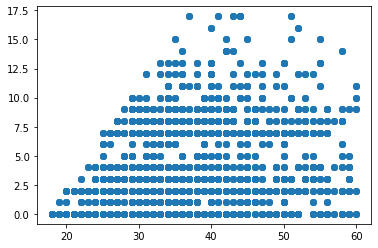

In [97]:
plt.scatter(dataset.Age,dataset.YearsWithCurrManager)

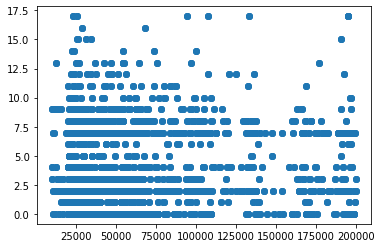

In [98]:
plt.scatter(dataset.MonthlyIncome,dataset.YearsWithCurrManager)

Data Visualization[link text](https://github.com/RAGHUKALLI/upgrade/blob/master/Data%20Visualization-Attrition%20analysis.pdf)